In [ ]:
# Pas preliminar: Încărcarea și afișarea datelor
import pandas as pd

df = pd.read_csv('/content/smokers.csv')
display(df.head())

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# 1. Analiza datelor - Verificați numărul de valori null
display(df.isna().sum())

,0
Unnamed: 0,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0


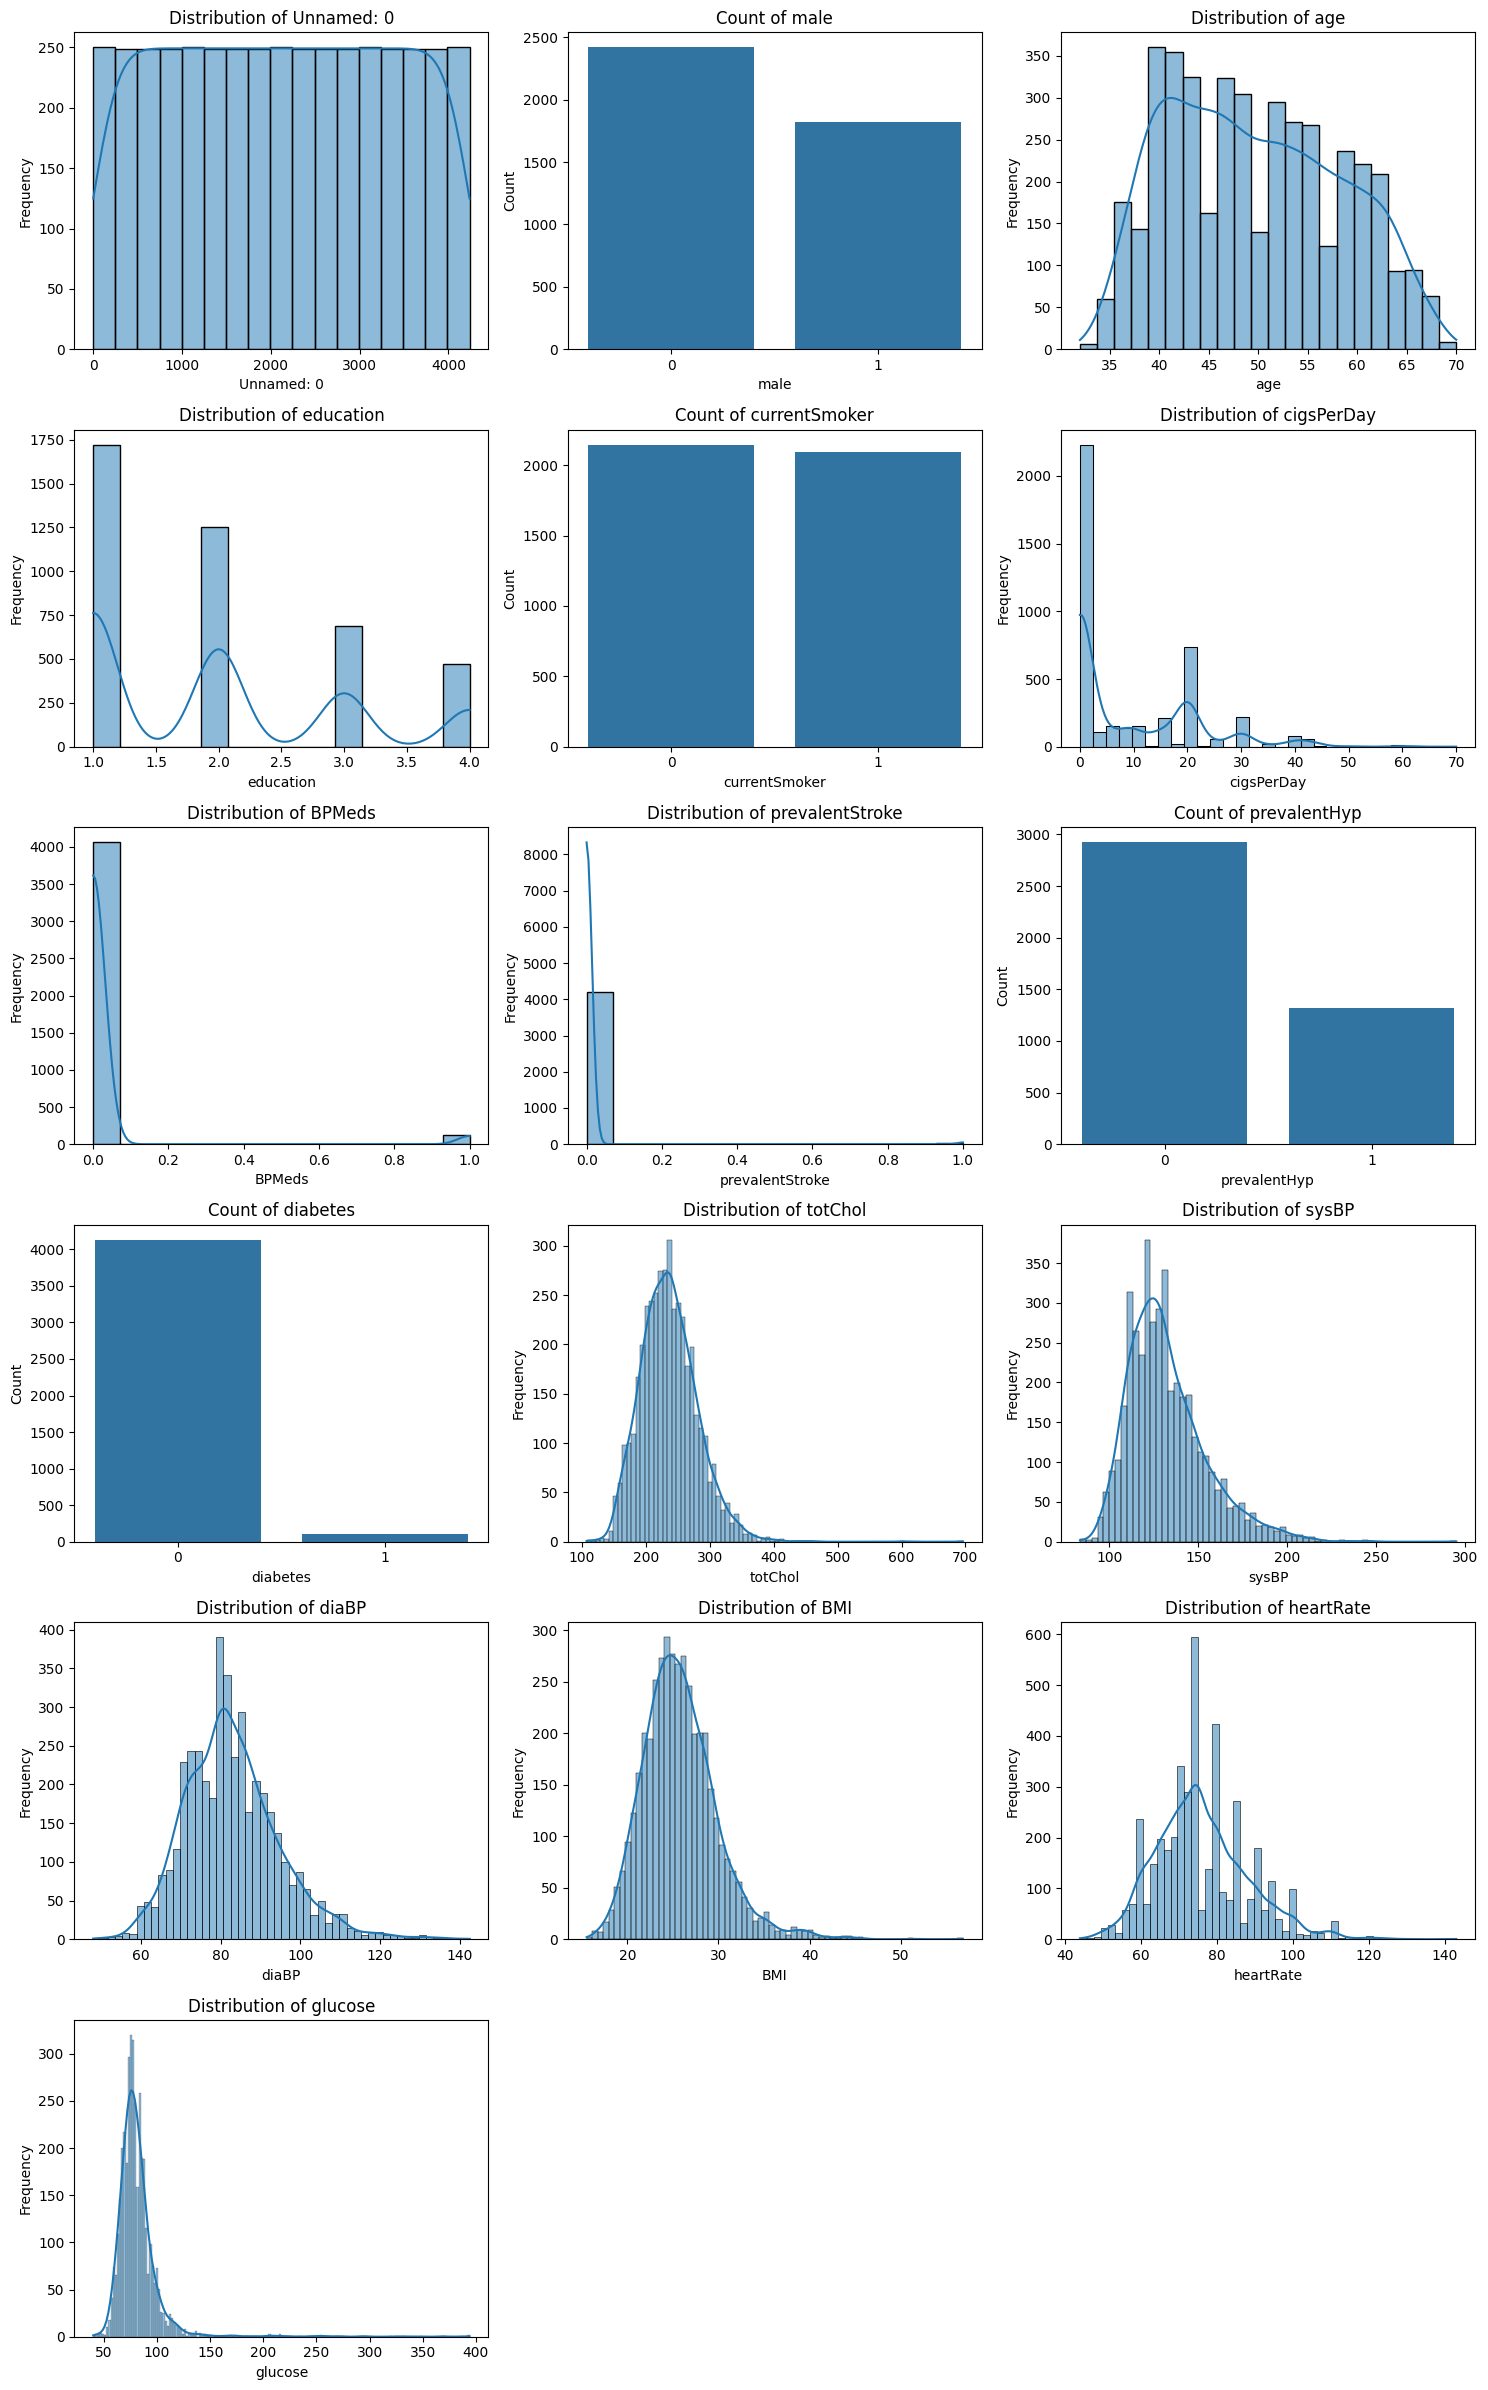

In [ ]:
# 1. Analiza datelor - Vizualizare distribuție variabile
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude target variable and identify binomial columns
columns_to_exclude = ['TenYearCHD']
binomial_cols = ['male', 'currentSmoker', 'prevalentHyp', 'diabetes']

# Filter out excluded columns from numerical_cols
plot_cols = [col for col in numerical_cols if col not in columns_to_exclude]

# Determine the number of rows and columns for the subplot grid
num_plots = len(plot_cols)
num_cols_subplot = 3  # You can adjust this number
num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot

plt.figure(figsize=(num_cols_subplot * 5, num_rows_subplot * 4))

for i, column in enumerate(plot_cols):
    plt.subplot(num_rows_subplot, num_cols_subplot, i + 1)

    if column in binomial_cols:
        sns.countplot(x=df[column].dropna())
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    else:
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:

# 2. Procesarea datelor - Eliminare coloană inutilă (pas intermediar)
df = df.drop(columns=['Unnamed: 0'])
display(df.head())

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# 2. Procesarea datelor - Completarea/Eliminarea valorilor lipsă
# Drop rows where 'glucose' is null
df = df.dropna(subset=['glucose'])

# Drop rows where 'heartRate' is null
df = df.dropna(subset=['heartRate'])

# Impute 'totChol', 'cigsPerDay', 'BMI' with median
for col in ['totChol', 'cigsPerDay', 'BMI']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Impute 'education' with mode
mode_education = df['education'].mode()[0]
df['education'] = df['education'].fillna(mode_education)

# Impute 'BPMeds' with mode
mode_bpmeds = df['BPMeds'].mode()[0]
df['BPMeds'] = df['BPMeds'].fillna(mode_bpmeds)

# Display the count of null values after handling
display(df.isna().sum())


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


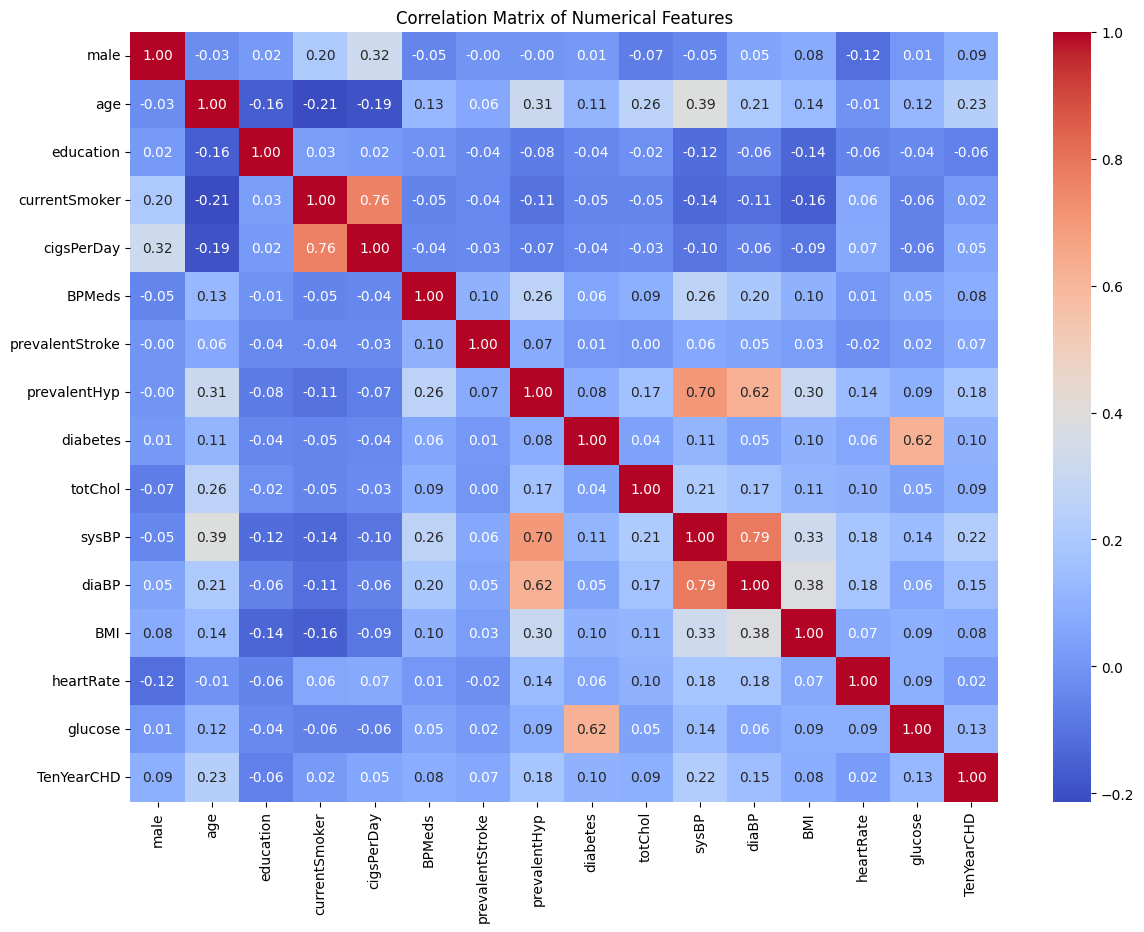

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


In [ ]:
# 2. Procesarea datelor - Matricea de corelație și eliminarea coloanelor corelate
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Columns to drop
columns_to_drop = ['currentSmoker', 'prevalentHyp', 'diabetes', 'diaBP']

# Drop columns
df = df.drop(columns=columns_to_drop)

# Display head to confirm columns are dropped
display(df.head())


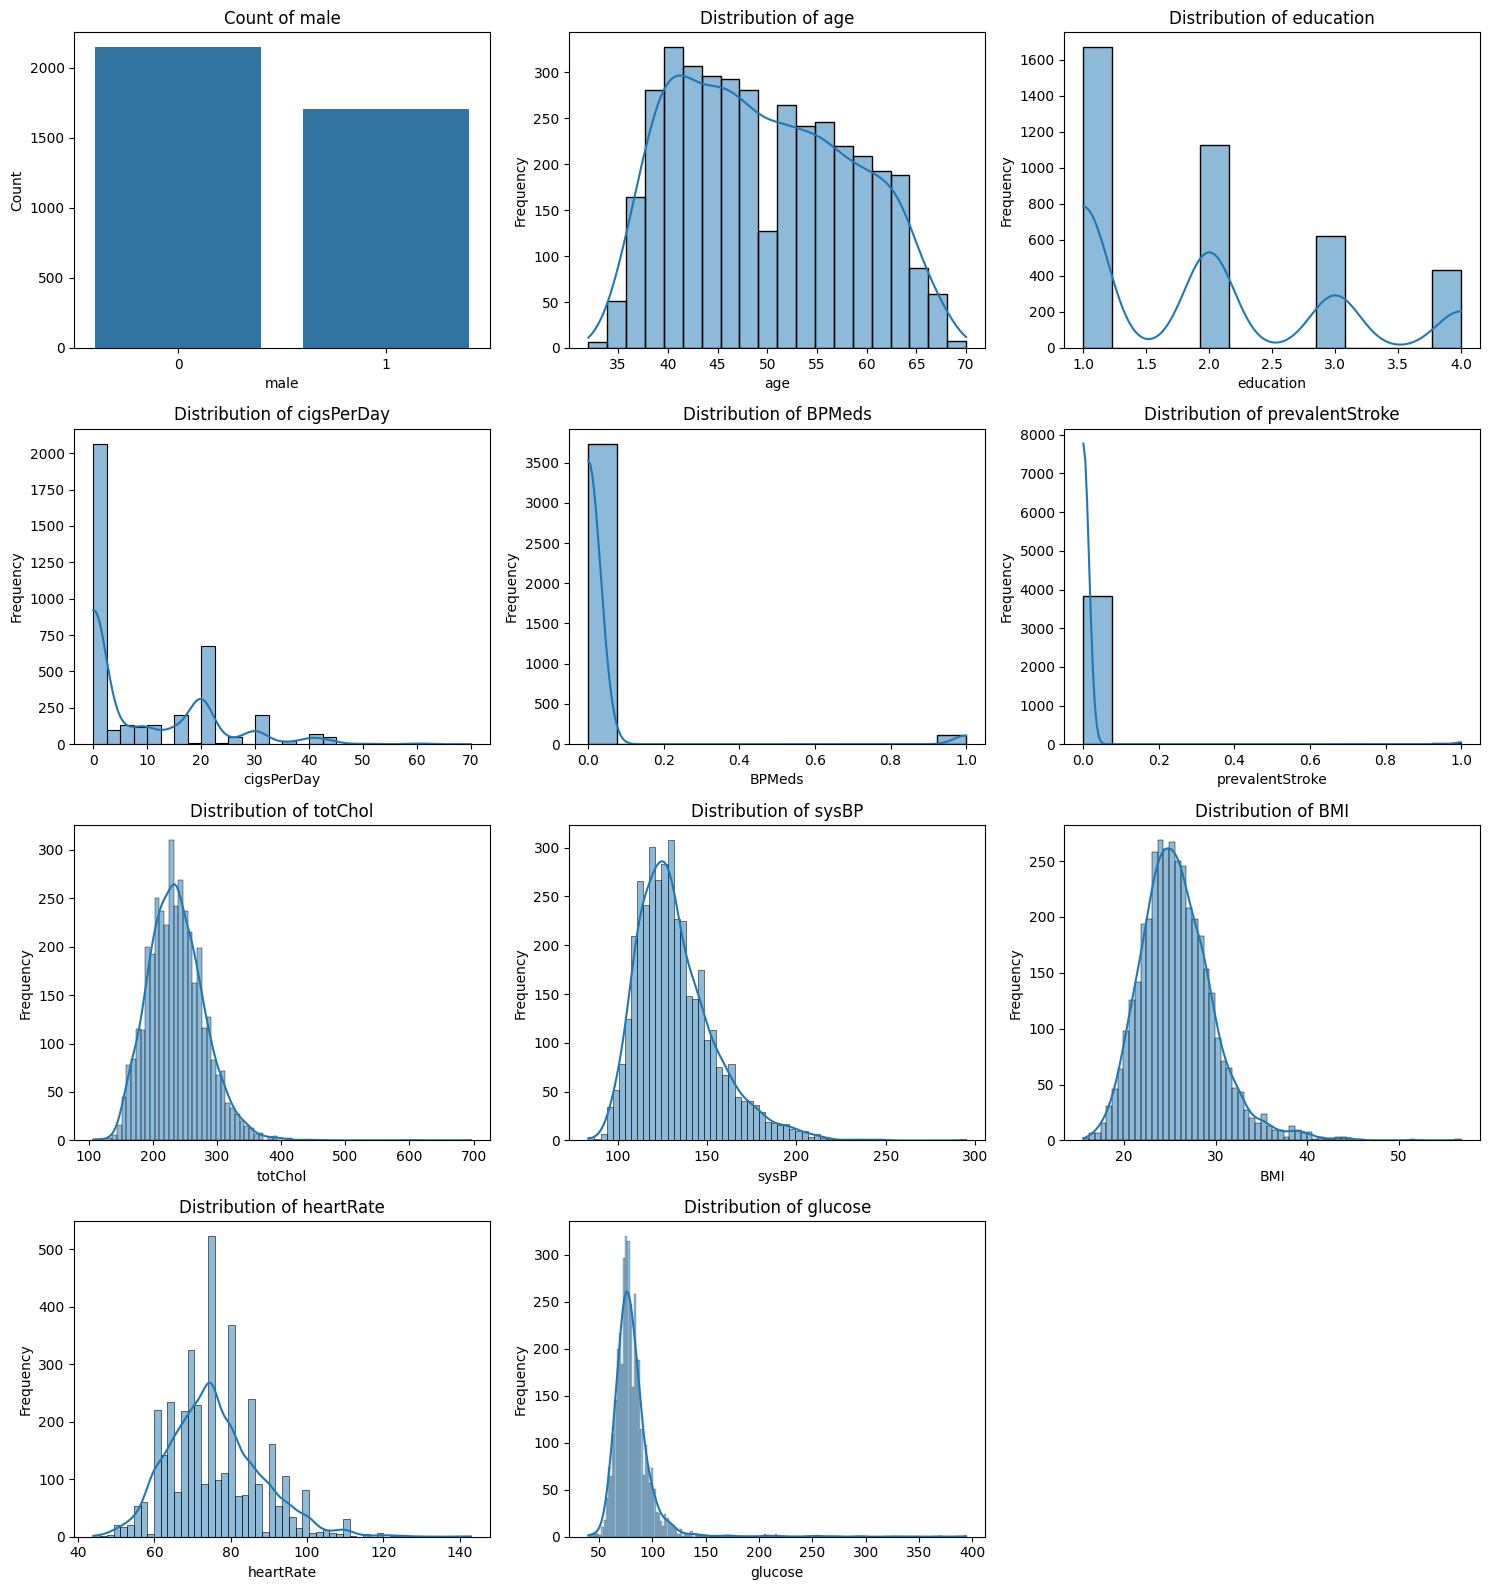

In [ ]:
# Select numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude target variable and identify binomial columns
columns_to_exclude = ['TenYearCHD']
binomial_cols = ['male', 'currentSmoker', 'prevalentHyp', 'diabetes']

# Filter out excluded columns from numerical_cols
plot_cols = [col for col in numerical_cols if col not in columns_to_exclude]

# Determine the number of rows and columns for the subplot grid
num_plots = len(plot_cols)
num_cols_subplot = 3  # You can adjust this number
num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot

plt.figure(figsize=(num_cols_subplot * 5, num_rows_subplot * 4))

for i, column in enumerate(plot_cols):
    plt.subplot(num_rows_subplot, num_cols_subplot, i + 1)

    if column in binomial_cols:
        sns.countplot(x=df[column].dropna())
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    else:
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
display(df.describe())

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000
mean,0.442453,49.640166,1.952455,8.917641,0.029618,0.006235,236.998181,132.439465,25.808023,75.733437,81.964406,0.154066
std,0.496742,8.594204,1.020616,11.895868,0.169553,0.078728,44.717905,22.126863,4.058327,11.929546,23.962669,0.361059
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,107.000000,83.500000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,206.000000,117.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,234.000000,128.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,20.000000,0.000000,0.000000,264.000000,144.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,70.000000,1.000000,1.000000,696.000000,295.000000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# 2. Procesarea datelor - Scalarea caracteristicilor
from sklearn.preprocessing import StandardScaler

# Identify all numerical columns
all_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Binomial columns to exclude from scaling
binomial_cols = ['male', 'BPMeds', 'prevalentStroke', 'TenYearCHD']

# Columns to apply StandardScaler
columns_to_scale = [col for col in all_numerical_cols if col not in binomial_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the descriptive statistics of the scaled columns to verify
display(df[columns_to_scale].describe())


,age,education,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose
count,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03,3.849000e+03
mean,3.973612e-16,-3.692090e-18,-7.476482e-17,-1.859890e-16,4.098220e-16,9.562513e-16,5.132005e-16,1.283001e-16
std,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00
min,-2.052832e+00,-9.333369e-01,-7.497393e-01,-2.907450e+00,-2.212054e+00,-2.530441e+00,-2.660417e+00,-1.751468e+00
25%,-8.891060e-01,-9.333369e-01,-7.497393e-01,-6.932840e-01,-6.978608e-01,-6.698268e-01,-6.483434e-01,-4.576214e-01
50%,-7.449781e-02,4.659047e-02,-7.497393e-01,-6.705526e-02,-2.006629e-01,-1.005527e-01,-6.148872e-02,-1.654624e-01
75%,8.564830e-01,1.026518e+00,9.317352e-01,6.039041e-01,5.225340e-01,5.500462e-01,5.253659e-01,2.101706e-01
max,2.369327e+00,2.006445e+00,5.135422e+00,1.026572e+01,7.347705e+00,7.637631e+00,5.639385e+00,1.302343e+01


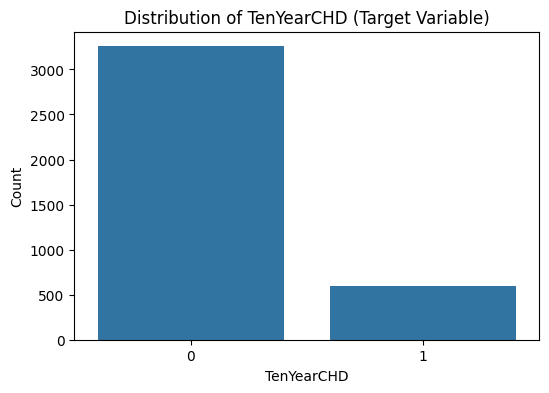

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df['TenYearCHD'])
plt.title('Distribution of TenYearCHD (Target Variable)')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')

plt.show()


In [ ]:
# 3. Antrenarea modelului - Separare date în X/y și seturi de antrenament/testare (stratificat)
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display the shapes of the resulting datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify the stratification (optional, but recommended)
print("\nDistribution of TenYearCHD in original data:")
display(y.value_counts(normalize=True))

print("\nDistribution of TenYearCHD in training set:")
display(y_train.value_counts(normalize=True))

print("\nDistribution of TenYearCHD in testing set:")
display(y_test.value_counts(normalize=True))


X_train shape: (3079, 11)
X_test shape: (770, 11)
y_train shape: (3079,)
y_test shape: (770,)

Distribution of TenYearCHD in original data:


,proportion
TenYearCHD,
0,0.845934
1,0.154066



Distribution of TenYearCHD in training set:


,proportion
TenYearCHD,
0,0.846054
1,0.153946



Distribution of TenYearCHD in testing set:


,proportion
TenYearCHD,
0,0.845455
1,0.154545


SVC Model Performance:
Accuracy: 0.6662
Precision: 0.2553
Recall: 0.6050
F1-Score: 0.3591

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       651
           1       0.26      0.61      0.36       119

    accuracy                           0.67       770
   macro avg       0.58      0.64      0.57       770
weighted avg       0.80      0.67      0.71       770



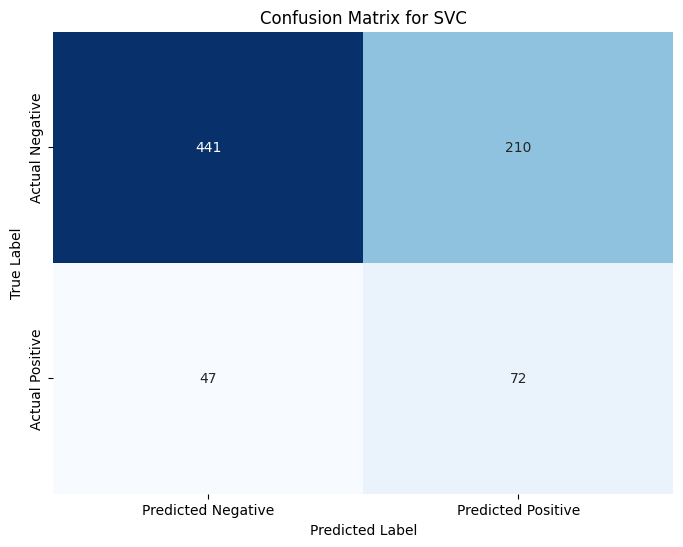

In [ ]:
# 3. Antrenarea modelului & 4. Evaluarea modelului - SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize an SVC model
svc_model = SVC(random_state=42, probability=True, class_weight='balanced')

# 2. Train the model
svc_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)

# 4. Calculate and print evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print("SVC Model Performance:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")

# 5. Print a classification report
print("\nClassification Report for SVC:")
print(classification_report(y_test, y_pred_svc))

# 6. Generate and visualize the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC')
plt.show()


Logistic Regression Model Performance:
Accuracy: 0.8519
Precision: 0.7273
Recall: 0.0672
F1-Score: 0.1231

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       651
           1       0.73      0.07      0.12       119

    accuracy                           0.85       770
   macro avg       0.79      0.53      0.52       770
weighted avg       0.83      0.85      0.80       770



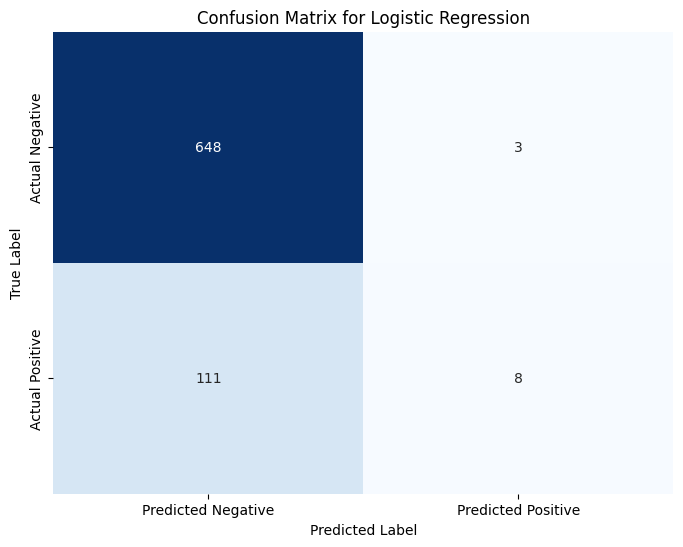

In [ ]:
# 3. Antrenarea modelului & 4. Evaluarea modelului - LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize a Logistic Regression model
log_reg_model = LogisticRegression(solver='lbfgs', C=0.75, max_iter=1000)

# 2. Train the model
log_reg_model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred_lr = log_reg_model.predict(X_test)

# 4. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 5. Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# 6. Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
